In [1]:
import matplotlib.pyplot as plt
from GSKL_Exact_Funcs import *
from scipy.sparse import eye
import numpy as np

In [2]:
N = 4

s0, sx, sy, sz, sp, sm = Pauli(N)

J = 1
Delta = 1
Nt = 1000
dt = 0.01

gammas = [0.5, 0.5]
fs = [0, 1]


H = hamiltonian(N, J, Delta, s0, sx, sy, sz)
if  N >= 6:
    rho0 = eye(N, dtype = complex)/len(H)
else:
    rho0 = np.eye(2**N, dtype = complex)/len(H)


op01 = create_string(N, 0, sp, s0)
op02 = create_string(N, 0, sm, s0)

op11 = create_string(N, N-1, sp, s0)
op12 = create_string(N, N-1, sm, s0)

op_dis = [op01, op02, op11, op12]

szloc = []
for i in range(N):
    szloc.append(create_string(N, i, sz, s0))

In [3]:
eps = 1e-4

#for i in range(N):
rho_tr, Opmean, liouvillian_mean = time_evolution2(N, Nt, dt, H, rho0, gammas, fs, op_dis, szloc[-1], eps)


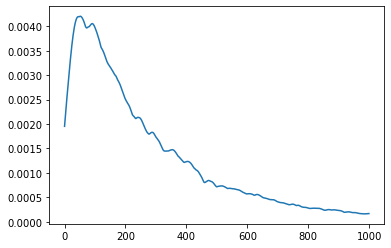

In [4]:
plt.plot(liouvillian_mean)